In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib as plt
#import tensorflow as tf

In [2]:
# matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


# Pandas and Numpy
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [3]:
#import connection string (youll need to create this)
from config import conn

# create the engine
engine = create_engine(conn)
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
us_data = Base.classes.us_data_df
#Historical_Price = Base.classes.historical_price_by_day

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [35]:
#create df from Recession_Indicator table
results = []

results = session.query(#us_data.intdate, \
                        us_data.recession_indicator, \
                        #us_data.country, \
                        #us_data.spy_open, \
                        #us_data.spy_high, \
                        #us_data.spy_low, \
                        #us_data.spy_close, \
                        #us_data.spx_open, \
                        #us_data.spx_high, \
                        #us_data.spx_low, \
                        #us_data.spx_close, \
                        us_data.dji_open, \
                        #us_data.dji_high, \
                        #us_data.dji_low, \
                        us_data.dji_close, \
                        us_data.cpi, \
                        us_data.gdp, \
                        us_data.inflation, \
                        us_data.unemployment)


data_df = pd.DataFrame(results)
data_df.head()

recession_indicator dji_open dji_close        cpi     gdp  inflation  \
0                True     None      None  15.990414  1051.2   5.838255   
1                True     None      None  15.990414  1051.2   5.838255   
2                True     None      None  15.990414  1051.2   5.838255   
3                True     None      None  15.990414  1051.2   5.838255   
4                True     None      None  15.990414  1051.2   5.838255   

   unemployment  
0      3.873711  
1      4.213119  
2      4.394145  
3      4.636633  
4      4.715396

In [36]:
# Import our input dataset
#data_df = pd.read_csv('us_data_df.csv')
# Fill in the empty rows with "0". (4.5.2)
#data_df.fillna(0)
#data_df = data_df.dropna()
data_df.head()

recession_indicator dji_open dji_close        cpi     gdp  inflation  \
0                True     None      None  15.990414  1051.2   5.838255   
1                True     None      None  15.990414  1051.2   5.838255   
2                True     None      None  15.990414  1051.2   5.838255   
3                True     None      None  15.990414  1051.2   5.838255   
4                True     None      None  15.990414  1051.2   5.838255   

   unemployment  
0      3.873711  
1      4.213119  
2      4.394145  
3      4.636633  
4      4.715396

In [37]:
# convert to float
data_df[['dji_open','dji_close']] = data_df[['dji_open','dji_close']].astype(float)

data_df = pd.get_dummies(data_df, columns=["recession_indicator"])
data_df["dji_diff"] = data_df["dji_close"]-data_df["dji_open"]
data_df = data_df.fillna(0)

data_df.head()

dji_open  dji_close        cpi     gdp  inflation  unemployment  \
0       0.0        0.0  15.990414  1051.2   5.838255      3.873711   
1       0.0        0.0  15.990414  1051.2   5.838255      4.213119   
2       0.0        0.0  15.990414  1051.2   5.838255      4.394145   
3       0.0        0.0  15.990414  1051.2   5.838255      4.636633   
4       0.0        0.0  15.990414  1051.2   5.838255      4.715396   

   recession_indicator_False  recession_indicator_True  dji_diff  
0                          0                         1       0.0  
1                          0                         1       0.0  
2                          0                         1       0.0  
3                          0                         1       0.0  
4                          0                         1       0.0

In [38]:
data_df = data_df.drop({"recession_indicator_False"}, axis=1)

data_df.dtypes

dji_open                    float64
dji_close                   float64
cpi                         float64
gdp                         float64
inflation                   float64
unemployment                float64
recession_indicator_True      uint8
dji_diff                    float64
dtype: object

## Data Insights

In [39]:
# EDA on Data Table, showing 370 observations and 9 characteristics
data_df.shape

(18993, 8)

In [40]:
# EDA to see label of each column
data_df.columns.values 

array(['dji_open', 'dji_close', 'cpi', 'gdp', 'inflation', 'unemployment',
       'recession_indicator_True', 'dji_diff'], dtype=object)

In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18993 entries, 0 to 18992
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dji_open                  18993 non-null  float64
 1   dji_close                 18993 non-null  float64
 2   cpi                       18993 non-null  float64
 3   gdp                       18993 non-null  float64
 4   inflation                 18993 non-null  float64
 5   unemployment              18993 non-null  float64
 6   recession_indicator_True  18993 non-null  uint8  
 7   dji_diff                  18993 non-null  float64
dtypes: float64(7), uint8(1)
memory usage: 1.0 MB


- Data has only object values
- No variable column has null or missing values

## Summary Statistics

In [42]:
# EDA on Historical Price Table, beginning with basic statistics
data_df.describe()

dji_open     dji_close           cpi           gdp     inflation  \
count  18993.000000  18993.000000  18993.000000  18993.000000  18993.000000   
mean    4863.504193   4864.275162     60.205519   2850.917749      3.809458   
std     6652.480087   6653.551674     29.753817   5354.869377      2.951529   
min        0.000000      0.000000      0.000000      0.000000     -0.355546   
25%        0.000000      0.000000     37.381285      0.000000      2.130110   
50%     1018.760000   1018.760000     62.063059      0.000000      3.156842   
75%     9552.680000   9554.370000     86.613197   3162.532000      4.300535   
max    29440.470000  29551.420000    109.295958  21729.124000     13.549202   

       unemployment  recession_indicator_True      dji_diff  
count  18993.000000              18993.000000  18993.000000  
mean       0.200137                  0.450166      0.770969  
std        1.143454                  0.497523     75.620397  
min        0.000000                  0.000000  -1141.340000  
25%        0.000000                  0.000000      0.000000  
50%        0.000000                  0.000000      0.000000  
75%        0.000000                  1.000000      0.000000  
max       14.821829                  1.000000   1211.800000

### Key Observations
- dataset comprises of 64,708 observations and 4 chracteriestics
- out of which x is dependent variable and the remaining x are independent variables
- Data needs to be redone.  Not capturing mean, Standard deviation etc

In [36]:
# EDA on Historical Price Table continued with pandas-profiling
pp.ProfileReport(data_df)

## EDA Data Visualizations


In [43]:
X = data_df.copy()
X = X.drop("recession_indicator_True", axis=1)

X.head()

dji_open  dji_close        cpi     gdp  inflation  unemployment  dji_diff
0       0.0        0.0  15.990414  1051.2   5.838255      3.873711       0.0
1       0.0        0.0  15.990414  1051.2   5.838255      4.213119       0.0
2       0.0        0.0  15.990414  1051.2   5.838255      4.394145       0.0
3       0.0        0.0  15.990414  1051.2   5.838255      4.636633       0.0
4       0.0        0.0  15.990414  1051.2   5.838255      4.715396       0.0

In [44]:
y_cols = data_df["recession_indicator_True"] 

y = pd.DataFrame()

y["recession_indicator_True"] = y_cols
y.head()

recession_indicator_True
0                         1
1                         1
2                         1
3                         1
4                         1

In [45]:
y['recession_indicator_True'].value_counts()

0    10443
1     8550
Name: recession_indicator_True, dtype: int64

In [46]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cols, random_state=1)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs", max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")



 Logistic regression model accuracy: 0.572


In [48]:

from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0         1794          811
Actual 1         1223          921

In [49]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.69      0.64      2605
           1       0.53      0.43      0.48      2144

    accuracy                           0.57      4749
   macro avg       0.56      0.56      0.56      4749
weighted avg       0.57      0.57      0.56      4749



## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:


# Create a random forest classifier. (17.8.3)
rf_model = RandomForestClassifier(n_estimators=128, random_state=78, max_depth=4) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [52]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0         2540           65
Actual 1         1129         1015

In [53]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         2540           65
Actual 1         1129         1015

Accuracy Score : 0.7485786481364498
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.98      0.81      2605
           1       0.94      0.47      0.63      2144

    accuracy                           0.75      4749
   macro avg       0.82      0.72      0.72      4749
weighted avg       0.80      0.75      0.73      4749



In [54]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.46847460411856134, 'inflation'),
 (0.2720257199885881, 'cpi'),
 (0.09484383360547533, 'dji_open'),
 (0.08654894958132006, 'dji_close'),
 (0.06402569339182268, 'gdp'),
 (0.013100372074651395, 'dji_diff'),
 (0.0009808272395810094, 'unemployment')]

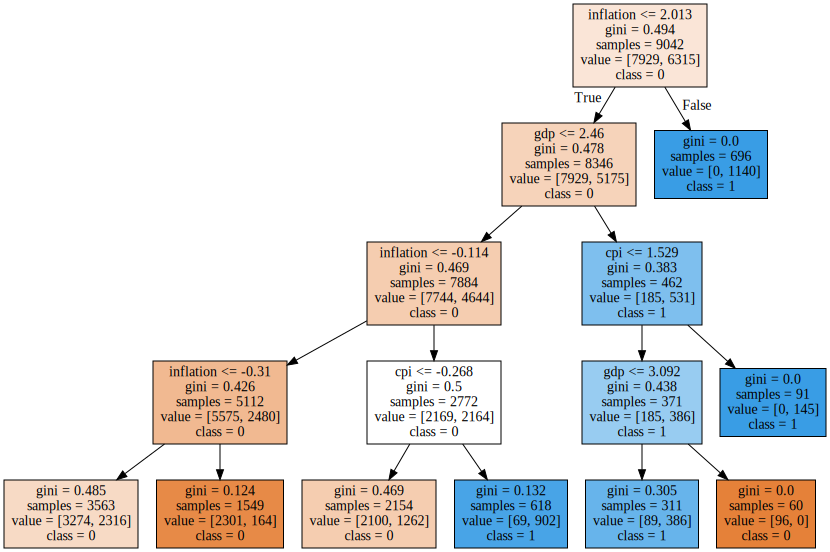

In [55]:
import graphviz
from sklearn import tree
#for tree_in_forest in rf_model.estimators_:
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None, 
                      feature_names=X.columns,  
                      class_names=["0","1"],  
                      filled=True)
graph = graphviz.Source(classification_tree) 
graph

## Check for missing values

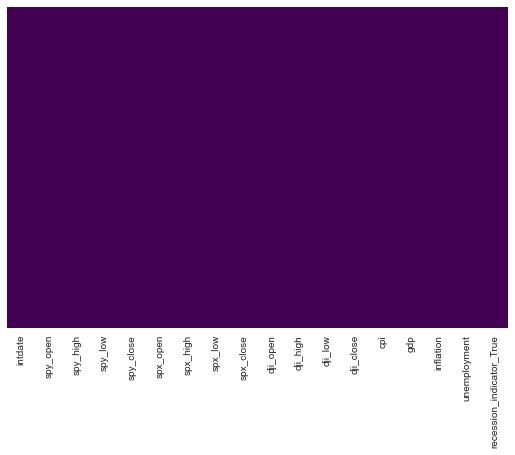

In [24]:
import seaborn as sns
sns.heatmap(data_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## Checking Correlation

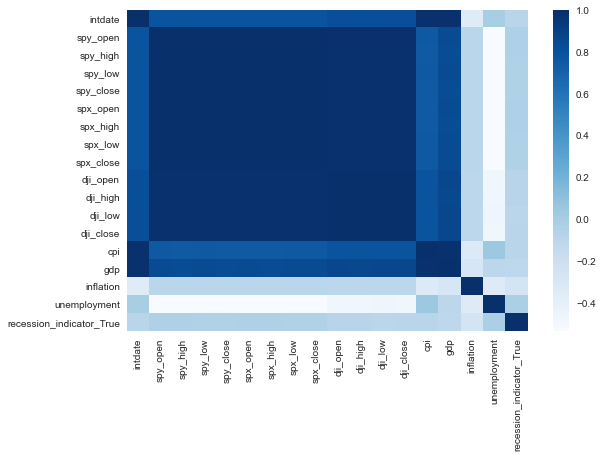

In [30]:
from matplotlib import figure
plt.figure.Figure(figsize=(6,4))
sns.heatmap(data_df.corr(),cmap='Blues',annot=False)

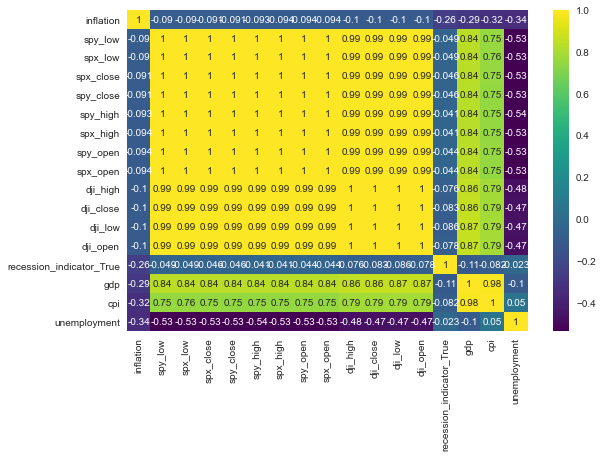

In [40]:
#Quality correlation matrix
k = 17# number of variables for heatmap
cols = data_df.corr().nlargest(k, 'inflation')['inflation'].index
cm = data_df[cols].corr()
plt.figure.Figure(figsize=(20,20))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Checking for outliers

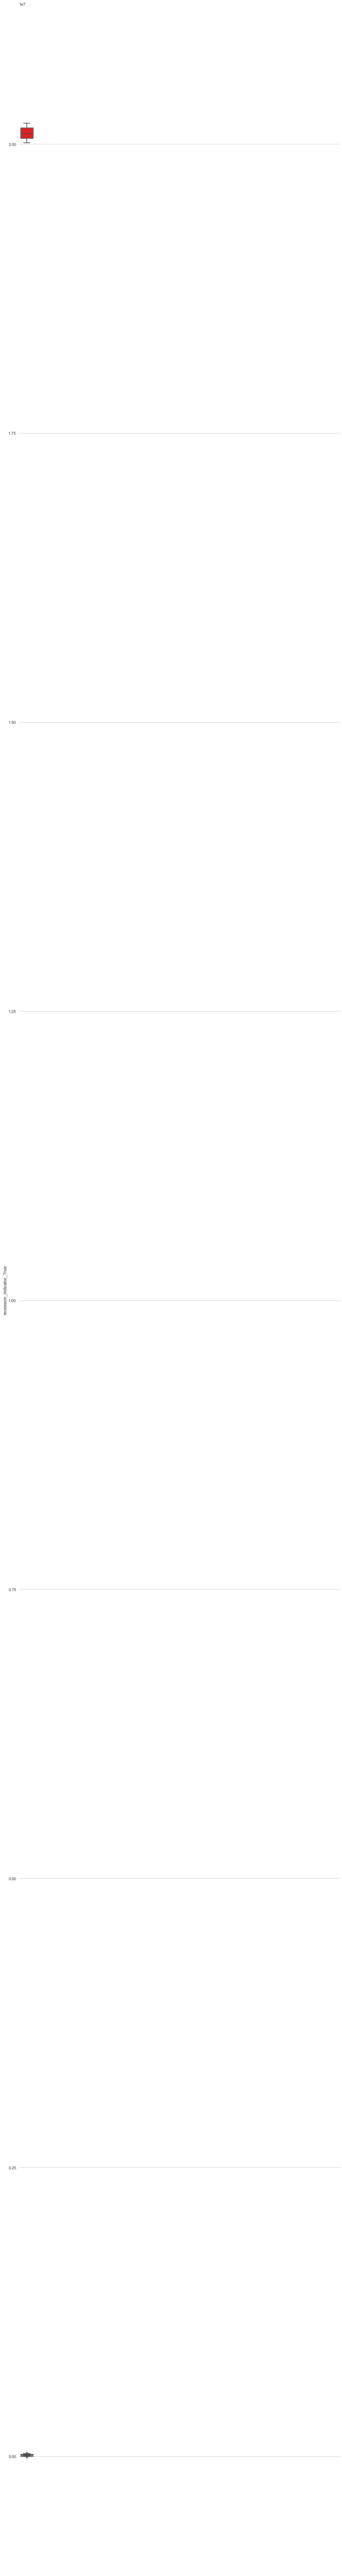

In [50]:
import matplotlib.pyplot as plt

l = data_df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.plot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_df[l[i]],color='red',orient='v')
    plt.tight_layout()

## Checking skewness

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot({INSERT OUR DF HERE}[l[i]],kde=True) 